In [4]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re
from collections import defaultdict
from nltk.corpus import stopwords
from nltk.util import ngrams

In [47]:
fpath = "C:\\Users\\Happy\\Desktop\\Computer Science\\Projects\\Native\\reviews_facebook.csv"
data = pd.read_csv(fpath)

In [3]:
data.columns

Index(['Name ', 'Review', 'Date ', 'Time', 'Recommendation', 'Sex',
       'Location'],
      dtype='object')

In [21]:
def create_corpus(target):
    corpus=[]
    
    for words in data[data['Recommendation']==target]['Review'].str.split():
        for i, word in enumerate(words):
            corpus.append(words[i])
    return corpus

In [51]:
from sklearn.preprocessing import LabelEncoder
lbl= LabelEncoder()
lbl.fit(list(data['Recommendation'].values)) 
data['Recommendation'] = lbl.transform(list(data['Recommendation'].values))

stop=set(stopwords.words('english'))
corpus=create_corpus(0)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 


<BarContainer object of 10 artists>

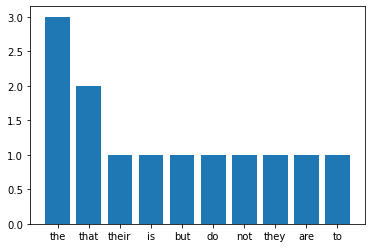

In [52]:
x,y=zip(*top)
plt.bar(x,y)

<BarContainer object of 10 artists>

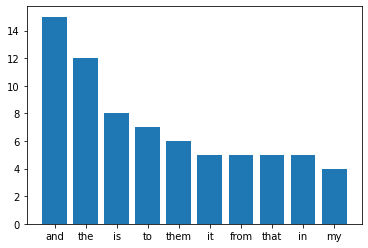

In [53]:
corpus=create_corpus(1)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    


x,y=zip(*top)
plt.bar(x,y)

,Name,Review,Date,Time,Recommendation,Sex,Location
0,Erin Kelly,My giant store added this product recently it ...,13-10-2020,22:25:51,Recommends,Female,NaN
1,Tammy Loeb,fresh delicious greens that are pesticide free...,31-07-2020,22:26:03,Recommends,Female,Pennsylvania
2,Betty Kaye,"They make fresh, healthy food available locall...",29-07-2020,16:22:53,Recommends,Female,New York
3,Anna Marie Torre Wright,Awesome lettuces! (Sunny Crunch is my favorite...,24-01-2020,19:01:07,Recommends,Female,New Jersey
4,Susan Oglesby,Awesome greens. We bought some Sunny Crunch tw...,02-04-2020,23:12:13,Recommends,Female,Virginia


In [54]:
from collections import  Counter
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:40]:
    if (word not in stop) :
        x.append(word)
        y.append(count)


<AxesSubplot:>

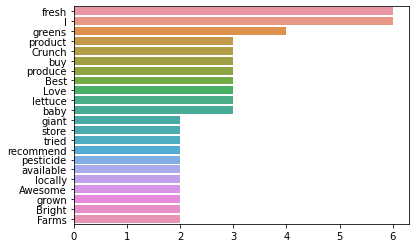

In [55]:
sns.barplot(x=y,y=x)

In [26]:
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

example="I am a #king"
print(remove_punct(example))

I am a king


In [56]:
data['Review']=data['Review'].apply(lambda x : remove_punct(x))

In [58]:
!pip install pyspellchecker

In [59]:
from spellchecker import SpellChecker

spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)
        
text = "corect me plese"
correct_spellings(text)

'correct me please'

In [61]:
data['Review']=data['Review'].apply(lambda x : correct_spellings(x))

In [62]:
data

,Name,Review,Date,Time,Recommendation,Sex,Location
0,Erin Kelly,My giant store added this product recently it ...,13-10-2020,22:25:51,1,Female,NaN
1,Tammy Loeb,fresh delicious greens that are pesticide free...,31-07-2020,22:26:03,1,Female,Pennsylvania
2,Betty Kaye,They make fresh healthy food available locally...,29-07-2020,16:22:53,1,Female,New York
3,Anna Marie Torre Wright,Awesome lettuces Sunny Crunch is my favorite B...,24-01-2020,19:01:07,1,Female,New Jersey
4,Susan Oglesby,Awesome greens We bought some Sunny Crunch two...,02-04-2020,23:12:13,1,Female,Virginia
5,Barbara Burns,These were the best tasting salad greens I hav...,11-12-2019,15:43:02,1,Female,Missouri
6,Sally Miller,I got Spring MIx from a Giant grocery store in...,17-02-2020,14:06:39,1,Female,NaN
7,Candy Davis,Best there is Stays crisp for days even after ...,18-01-2020,23:50:25,1,Female,Ohio
8,Hiliary Bundle Styer,Love that we have local pesticide free lettuce...,31-01-2020,18:40:35,1,Female,NaN
9,Donna Deemer,they are fresh and crisp and very crunchy they...,07-08-2019,16:36:34,1,Female,West Virginia


In [63]:
data.to_csv('data.csv',index=False)